In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from cycler import cycler

%matplotlib inline
color_cycle = cycler('color',['#377eb8','#4daf4a','#e41a1c','#984ea3','#ff7f00','#a65628','#f781bf','#999999','#ffff33'])
mpl.rc('figure',figsize=[2.7,1.6])
mpl.rc('font',size=8.0)
#mpl.rcParams['font.sans-serif'] = 'Helvetica'
mpl.rc('lines',linewidth=0.7) 
mpl.rc('axes',prop_cycle=color_cycle,grid=True,linewidth=0.5,axisbelow=True,unicode_minus=False)
mpl.rc('grid',linewidth=0.3,linestyle=':')
mpl.rc('legend',fontsize='medium',framealpha=1.0,numpoints=1)
mpl.rc('svg',fonttype='none')
mpl.rc('savefig',dpi=300)
import numpy as np
from numpy import pi
import sys

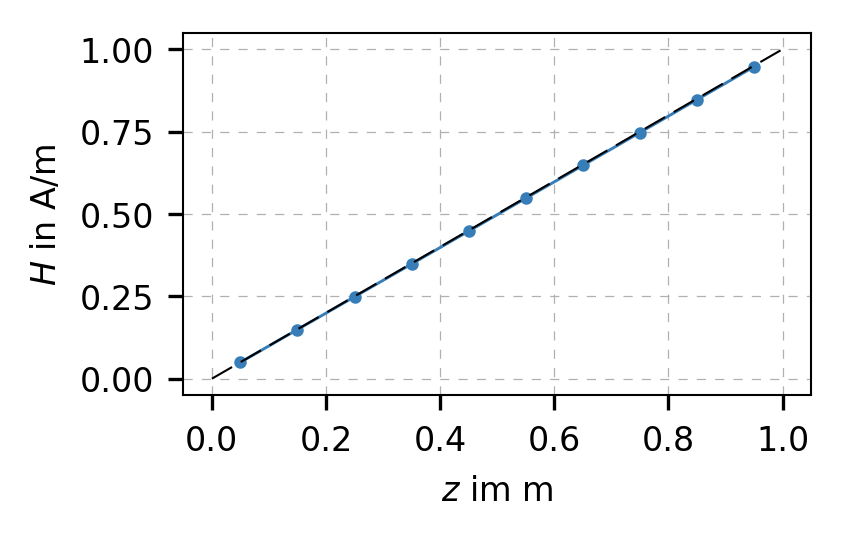

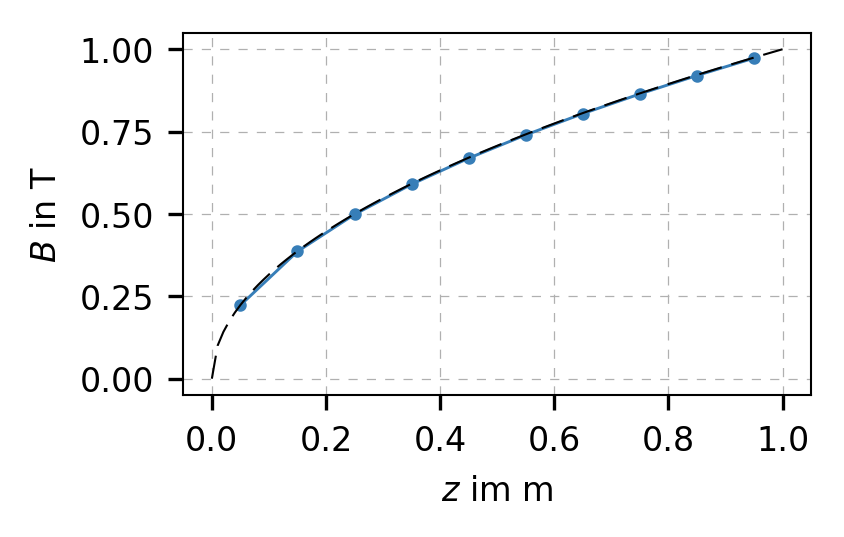

In [7]:
sys.path.append('../../../../../share/python/') # correct relative path
def getResults(file,multistep=1):
    from hdf5_tools import get_result, get_centroids, get_step_values
    from h5py import File
    h5 = File(file)
    r = {}
    try :
        regions = ['V'] #
        for result in ['magFieldIntensity','magFluxDensity','magTotalCurrentDensity']:
            vals = []
            for reg in regions:
                vals.append( get_result(h5,result,reg,step='all',multistep=multistep) )
            r[result] = np.vstack(vals)
        vals = []
        for reg in regions:
            vals.append( get_centroids(h5,reg) )
        r['cent'] = np.vstack(vals)
        r['stepval'] = get_step_values(h5)
        h5.close()
    except Exception as e:
        h5.close()
        print(e)
    return r
r = getResults('CurrentSheet3D.h5ref')

J = 1e+0 # current density of excitation

Ns = np.argsort(r['cent'][:,-1])
z = np.linspace(0,1,100) # z coordiante
H = J*z # Durchflutung = H

fig,ax = plt.subplots()
ax.plot(r['cent'][Ns,-1],r['magFieldIntensity'][Ns,0],'-o',ms=2)
ax.plot(z,H,'--k',lw=0.5)
ax.set_xlabel('$z$ im m')
ax.set_ylabel('$H$ in A/m')

fig,ax = plt.subplots()
ax.plot(r['cent'][Ns,-1],r['magFluxDensity'][Ns,0],'-o',ms=2)
B = np.sqrt(H) # specified in mat.xml as nu = B
ax.plot(z,B,'--k',lw=0.5)
ax.set_xlabel('$z$ im m')
ax.set_ylabel('$B$ in T')

In [12]:
d['magFluxDensity'].shape

(3, 10, 3)

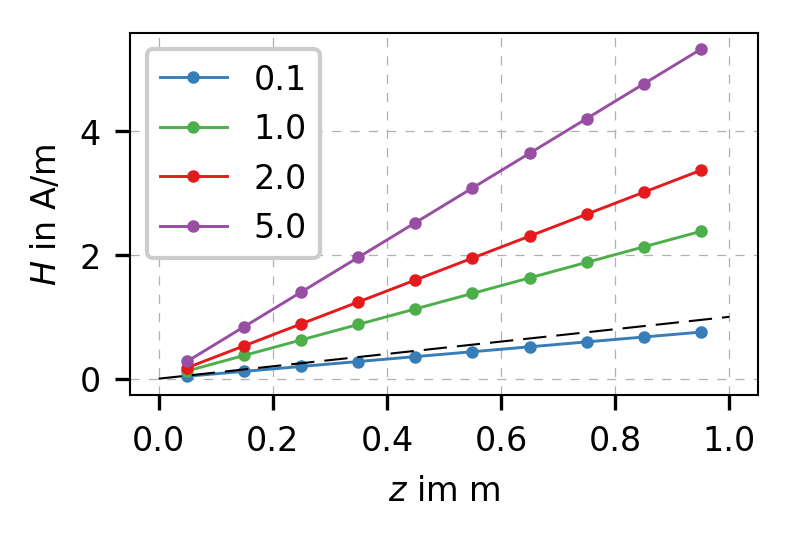

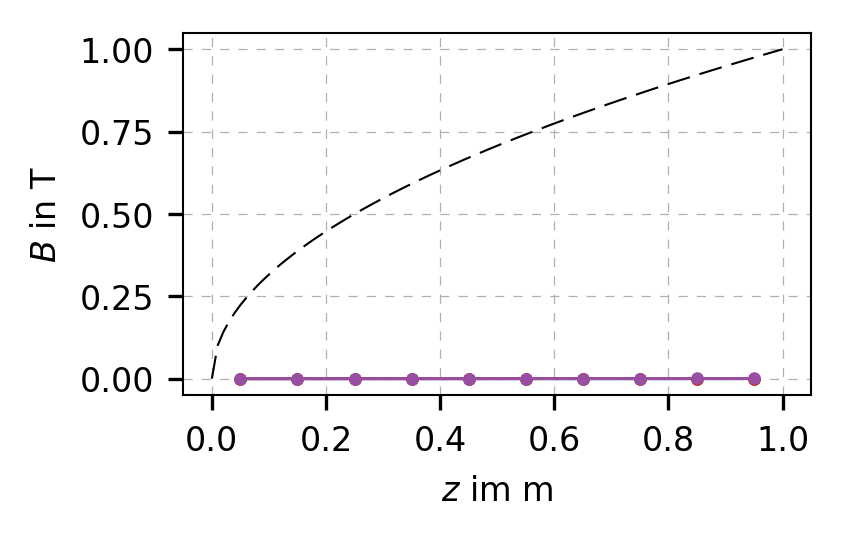

In [181]:
sys.path.append('../../../../../share/python/') # correct relative path
d = getResults('results_hdf5/test.cfs',multistep=2)

J = 1e+0 # current density of excitation

Ns = np.argsort(d['cent'][:,-1])
z = np.linspace(0,1,100) # z coordiante
H = J*z # Durchflutung = H

fig,ax = plt.subplots()
ax.plot(d['cent'][Ns,-1],np.abs(d['magFieldIntensity'][:,Ns,0]).T,'-o',ms=2)
ax.plot(z,H,'--k',lw=0.5)
ax.set_xlabel('$z$ im m')
ax.set_ylabel('$H$ in A/m')
ax.legend(d['stepval'][1])

fig,ax = plt.subplots()
ax.plot(d['cent'][Ns,-1],np.abs(d['magFluxDensity'][:,Ns,0]).T,'-o',ms=2)
B = np.sqrt(H) # specified in mat.xml as nu = B
ax.plot(z,B,'--k',lw=0.5)
ax.set_xlabel('$z$ im m')
ax.set_ylabel('$B$ in T')

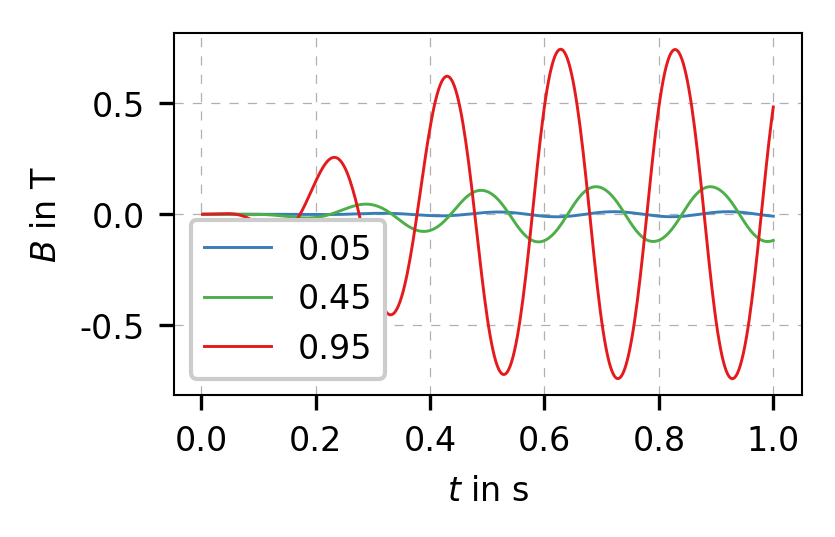

In [183]:
trans = getResults('results_hdf5/test.cfs',multistep=3)
Ns = np.argsort(trans['cent'][:,-1])[[0,4,-1]]
fig,ax = plt.subplots()
ax.plot(trans['stepval'][2],trans['magFluxDensity'][:,Ns,0],ms=2)

ax.set_xlabel('$t$ in s')
ax.set_ylabel('$B$ in T')
ax.legend(trans['cent'][Ns,-1])

(0, 0.81581308055155344)

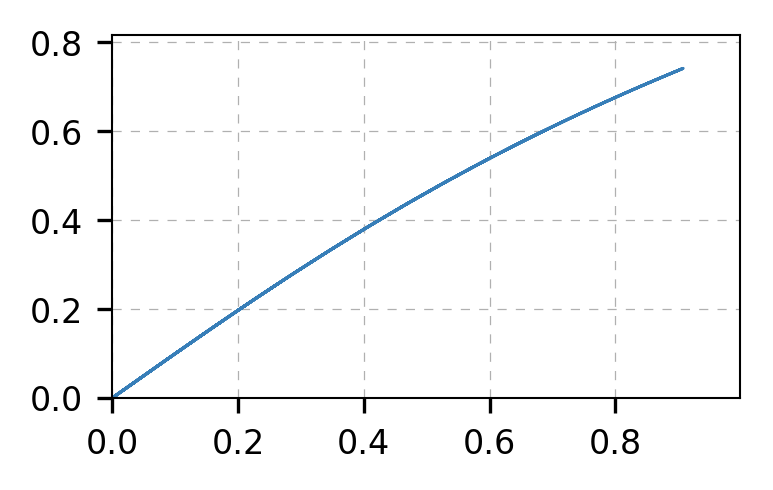

In [179]:
# plot in B-H plane
fig,ax=plt.subplots()
ax.plot(trans['magFieldIntensity'][:,Ns[-1],0],trans['magFluxDensity'][:,Ns[-1],0])
ax.set_xlim(0)
ax.set_ylim(0)

In [161]:
mh['magFluxDensity'][:,Ns[-1],0]

array([  8.61714194e-05 +6.66932134e-05j,
         4.32676747e-04 -1.91064436e-04j,
        -2.81070774e-04 -5.89643936e-04j,
        -1.25744909e-03 +3.54278874e-04j,
         1.92009025e-04 +1.48948672e-03j,
         2.81440926e-03 -3.98910677e-04j,
         6.22656565e-04 -3.66712351e-03j,
        -6.16643772e-03 -4.92388199e-04j,
        -3.73879374e-03 +8.85540366e-03j,
         1.50882516e-02 +4.98504704e-03j,
         2.33068408e-02 -3.16426064e-02j,
        -1.12493299e-01 -3.73366168e-03j,
         4.32907511e-01 +5.11079156e-01j,
         4.32907511e-01 -5.11079156e-01j,
        -1.12493299e-01 +3.73366168e-03j,
         2.33068408e-02 +3.16426064e-02j,
         1.50882516e-02 -4.98504704e-03j,
        -3.73879374e-03 -8.85540366e-03j,
        -6.16643772e-03 +4.92388199e-04j,
         6.22656565e-04 +3.66712351e-03j,
         2.81440926e-03 +3.98910677e-04j,
         1.92009025e-04 -1.48948672e-03j,
        -1.25744909e-03 -3.54278874e-04j,
        -2.81070774e-04 +5.8964393

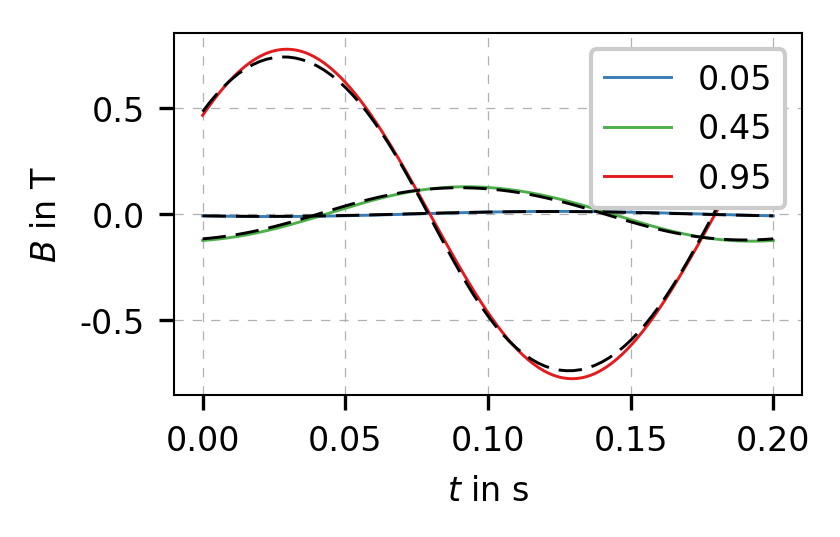

In [184]:
mh = getResults('results_hdf5/mh11.cfs',multistep=1)
def harmonic2time(vals_harmonic,f=None,Nt=20):
    from numpy import pi
    if f is None:
        Nh = int(vals_harmonic.shape[0]/2)
        hs = np.arange(1,2*Nh,2)
        f = np.hstack([-hs[::-1],hs])/2/pi
    else :
        Nh = int(len(f)/2)
    t = np.linspace(0,1/f[Nh],Nt*((Nh-1)*2+1))
    return t,np.tensordot(np.exp(1j*2*pi*np.outer(t,f)),vals_harmonic,(-1,0)).real
t,B = harmonic2time(mh['magFluxDensity'],mh['stepval'][-1])

T = 1/np.min(np.abs(mh['stepval'][-1]))
fig,ax = plt.subplots()
ax.plot(t,B[:,Ns,0])
It = trans['stepval'][2]>=(trans['stepval'][2][-1]-T)
for n in Ns :
    ax.plot(trans['stepval'][2][It]-4*T,trans['magFluxDensity'][It,n,0],'--k',ms=2)

ax.set_xlabel('$t$ in s')
ax.set_ylabel('$B$ in T')
ax.legend(trans['cent'][Ns,-1])